# Importing libraries for data analysis and visualization

In [55]:
import pandas as pd
import numpy as mp
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Reading the Input Data

In [100]:
coffee_production = pd.read_csv('total-production.csv').T
coffee_production.columns = coffee_production.iloc[0]
coffee_production.drop('total_production', inplace = True)

In [99]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


# Selecting and listing the top 5 countries by total coffee production

In [101]:
top5_countries = list(coffee_production.sum().sort_values(ascending = False).iloc[0:5].index)
top5_countries

['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']

# Comparing Brazil's coffee production vs. the rest of the world for the donut charts (1990 and 2018)

In [104]:
brazil_vs_others = (
    coffee_production
    .assign(
        Others = coffee_production.drop('Brazil', axis = 1).sum(axis = 1)
    )
    .loc[:, ['Brazil', 'Others']]
    .astype({'Brazil': 'float64', 'Others': 'float64'})
)


In [106]:
brazil_vs_others.head()

total_production,Brazil,Others
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [107]:
coffee_production = (
    coffee_production.assign(
        Rest_Of_World = coffee_production.drop(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], axis = 1).sum(axis = 1)
    )
)

top5_countries_2018 = (
    coffee_production.loc['2018', ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest_Of_World']]
)

In [109]:
top5_countries_2018.iloc[::-1]

total_production
Rest_Of_World    45786.0003
Ethiopia          7776.2234
Indonesia         9417.5942
Colombia          13857.962
Viet Nam         31174.0742
Brazil           62924.8836
Name: 2018, dtype: object

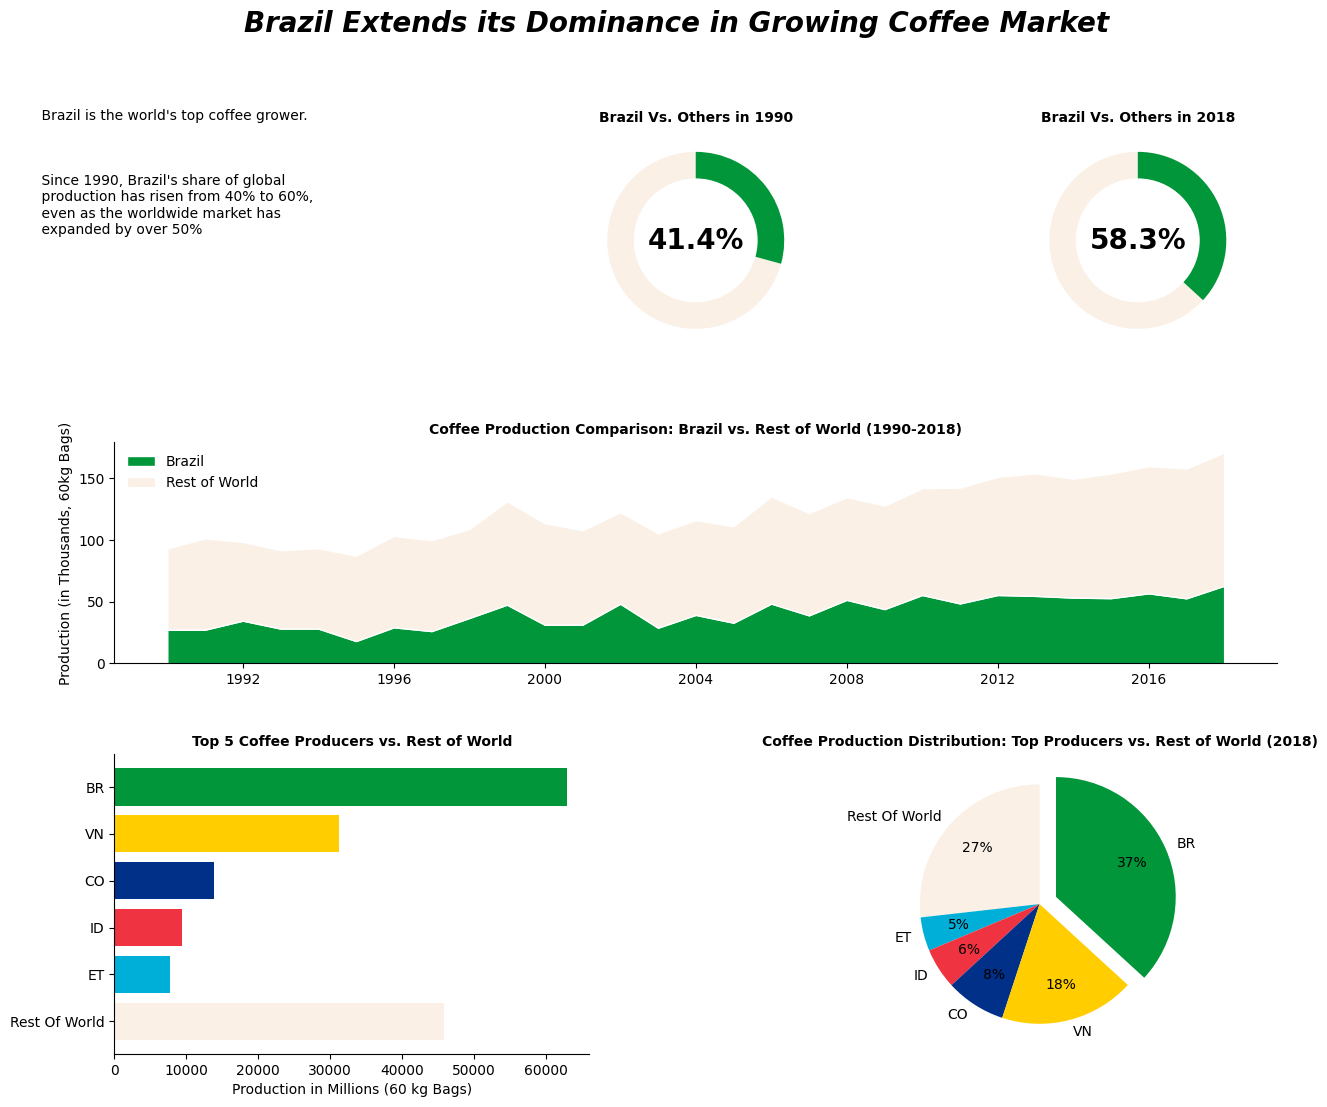

In [110]:
axes_settings = {
    'spines.top': False,
    'spines.right': False,
    'titlesize': 'Large'
}

plt.rc('axes', **axes_settings)

fig = plt.figure(figsize = (15, 12))

fig.suptitle(
    'Brazil Extends its Dominance in Growing Coffee Market',
    fontsize = 20,
    fontstyle = 'italic',
    fontweight = 'bold'
)
fig.text(
    0.065,
    0.78,
    '''
    Brazil is the world's top coffee grower.



    Since 1990, Brazil's share of global 
    production has risen from 40% to 60%,
    even as the worldwide market has 
    expanded by over 50%
    '''
)


nrows, ncols = [12, 12]
gs = GridSpec(
    nrows,
    ncols,
    figure = fig
)

ax1 = fig.add_subplot(gs[0:3, 4:8]) # Donut Chart 1
ax1.set_title("Brazil Vs. Others in 1990", fontweight = 'bold', fontsize = 10)
ax1.pie(
    brazil_vs_others.loc['1990'].sort_values(ascending = False),
    labels = ["", ""],
    colors = ['linen', '#009639'],
    startangle = 90,
    pctdistance = 0.85,
)

hole = plt.Circle(
    (0,0),
    0.7,
    fc = 'white'
)

fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990', 'Others']) * 100, 1)}%",
    ha = 'center',
    va = 'center',
    fontsize = 20,
    fontweight = 'bold'
)

ax2 = fig.add_subplot(gs[0:3, 9:12]) # Donut Chart 2
ax2.set_title("Brazil Vs. Others in 2018", fontweight = 'bold', fontsize = 10)
ax2.pie(
    brazil_vs_others.loc['2018'].sort_values(ascending = False),
    labels = ["", ""],
    colors = ['linen', '#009639'],
    startangle = 90,
    pctdistance = 0.85,
)

hole = plt.Circle(
    (0,0),
    0.7,
    fc = 'white'
)

fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 0,
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018', 'Others']) * 100, 1)}%",
    ha = 'center',
    va = 'center',
    fontsize = 20,
    fontweight = 'bold'
)

ax3 = fig.add_subplot(gs[4:7, :]) # Stackplot Chart
ax3.set_title("Coffee Production Comparison: Brazil vs. Rest of World (1990-2018)", fontweight = 'bold', fontsize = 10)
ax3.stackplot(
    brazil_vs_others.index.astype('datetime64[ns]'),
    brazil_vs_others['Brazil']/1_000,
    brazil_vs_others['Others']/1_000,
    labels = ['Brazil', 'Rest of World'],
    colors = ['#009639', 'linen'],
    edgecolor = 'white'
)
ax3.set_ylabel('Production (in Thousands, 60kg Bags)')
ax3.legend(loc = 'upper left', frameon = False)

ax4 = fig.add_subplot(gs[8:12, 0:5]) # Horizontal Bar Chart
ax4.set_title("Top 5 Coffee Producers vs. Rest of World", fontweight = 'bold', fontsize = 10)
ax4.barh(
    y = top5_countries_2018.index[::-1],
    width = top5_countries_2018[::-1],
    color = ['linen', '#00AFD7', '#EF3340', '#003087', '#FFCD00', '#009639']
)

positions = range(len(top5_countries_2018.index))
labels = ['Rest Of World', 'ET', 'ID', 'CO', 'VN', 'BR']
ax4.set_xlabel('Production in Millions (60 kg Bags)')
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)

ax5 = fig.add_subplot(gs[8:12, 7:12]) # Pie Chart
ax5.set_title("Coffee Production Distribution: Top Producers vs. Rest of World (2018)", fontweight = 'bold', fontsize = 10)
ax5.pie(
    top5_countries_2018[::-1],
    startangle = 90,
    labels = ['Rest Of World', 'ET', 'ID', 'CO', 'VN', 'BR'],
    colors = ['linen', '#00AFD7', '#EF3340', '#003087', '#FFCD00', '#009639'],
    explode = [0, 0, 0, 0, 0, 0.15],
    autopct = '%.0f%%',
    pctdistance = 0.7
)


plt.savefig('My_Report.png')
plt.show()